# 単回帰分析の結果の手計算

## (1) statsmodels formula APIの線形回帰分析用のOLS関数を利用

In [195]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats
# 表示桁数の設定
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [196]:
# 架空のデータフレームを作成（temperatureとbeerの関係）
np.random.seed(42)  # 再現性のため

# temperatureとbeerの8個のデータポイント
temperature = np.array([15.2, 18.5, 22.1, 25.3, 28.9, 31.2, 16.8, 19.4])

beer = np.array([42.1, 45.8, 49.2, 53.7, 57.3, 58.9, 43.2, 46.1])

# データフレーム作成
df = pd.DataFrame({
    'temperature': temperature,
    'beer': beer
})

df.head()

,temperature,beer
0,15.2,42.1
1,18.5,45.8
2,22.1,49.2
3,25.3,53.7
4,28.9,57.3


In [197]:
# statsmodels formula APIの線形回帰分析用のOLS関数を利用
model = smf.ols('beer ~ temperature', data=df)
results = model.fit()

# 線形回帰分析結果をまとめる
print(results.summary())

# # 個別の決定係数、回帰係数、切片をプリントアウト
# print("R-squared:", results.rsquared)
# print("Coefficients:\n", results.params)

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1125.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           4.67e-08
Time:                        05:48:09   Log-Likelihood:                -4.7085
No. Observations:                   8   AIC:                             13.42
Df Residuals:                       6   BIC:                             13.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      25.1230      0.749     33.533      

## (2) 上のoutput線形回帰分析結果を、今まで勉強した内容を利用して手計算(一部の結果は授業範囲を超えたので、計算しない)

In [198]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 架空のデータフレームを作成（temperatureとbeerの関係）
np.random.seed(42)  # 再現性のため

# temperatureとbeerの8個のデータポイント
temperature = np.array([15.2, 18.5, 22.1, 25.3, 28.9, 31.2, 16.8, 19.4])

beer = np.array([42.1, 45.8, 49.2, 53.7, 57.3, 58.9, 43.2, 46.1])

# データフレーム作成
df = pd.DataFrame({
    'temperature': temperature,
    'beer': beer
})

print("作成したデータフレーム:")
print(df.head(10))
print(f"\nデータ数: {len(df)}")

作成したデータフレーム:
   temperature  beer
0         15.2  42.1
1         18.5  45.8
2         22.1  49.2
3         25.3  53.7
4         28.9  57.3
5         31.2  58.9
6         16.8  43.2
7         19.4  46.1

データ数: 8


In [199]:
# ===============================
# 1. 基本統計量の計算
# ===============================
n = len(df)
x = df['temperature']
y = df['beer']

x_mean = np.mean(x)
y_mean = np.mean(y)

print(f"\n基本統計量:")
print(f"サンプル数 (n): {n}")
print(f"temperature平均: {x_mean:.4f}")
print(f"beer平均: {y_mean:.4f}")


基本統計量:
サンプル数 (n): 8
temperature平均: 22.1750
beer平均: 49.5375


In [200]:
# ===============================
# 2. 回帰係数の手計算
# ===============================
# β1 (slope) = Σ(xi - x̄)(yi - ȳ) / Σ(xi - x̄)²
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
beta1 = numerator / denominator

# β0 (intercept) = ȳ - β1 * x̄
beta0 = y_mean - beta1 * x_mean

print(f"\n回帰係数の手計算:")
print(f"β1 (slope): {beta1:.4f}")
print(f"β0 (intercept): {beta0:.4f}")


回帰係数の手計算:
β1 (slope): 1.1010
β0 (intercept): 25.1230


In [201]:
# ===============================
# 3. 予測値と残差の計算
# ===============================
y_pred = beta0 + beta1 * x
residuals = y - y_pred

print(f"\n予測値と残差:")
print(f"予測値の例 (最初の5個): {y_pred[:5]}")
print(f"残差の例 (最初の5個): {residuals[:5]}")

# ===============================
# 4. 分散分析とR²の手計算
# ===============================
# TSS (Total Sum of Squares) = Σ(yi - ȳ)²
TSS = np.sum((y - y_mean)**2)

# ESS (Explained Sum of Squares) = Σ(ŷi - ȳ)²
ESS = np.sum((y_pred - y_mean)**2)

# RSS (Residual Sum of Squares) = Σ(yi - ŷi)²
RSS = np.sum(residuals**2)

# R² = ESS / TSS = 1 - RSS / TSS
r_squared = ESS / TSS
r_squared_alt = 1 - RSS / TSS

# Adjusted R² = 1 - (RSS/(n-2)) / (TSS/(n-1))
adj_r_squared = 1 - (RSS/(n-2)) / (TSS/(n-1))

print(f"\n分散分析:")
print(f"TSS (Total Sum of Squares): {TSS:.4f}")
print(f"ESS (Explained Sum of Squares): {ESS:.4f}")
print(f"RSS (Residual Sum of Squares): {RSS:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")


予測値と残差:
予測値の例 (最初の5個): 0    41.858
1    45.491
2    49.455
3    52.978
4    56.942
Name: temperature, dtype: float64
残差の例 (最初の5個): 0    0.242
1    0.309
2   -0.255
3    0.722
4    0.358
dtype: float64

分散分析:
TSS (Total Sum of Squares): 286.6187
ESS (Explained Sum of Squares): 285.0988
RSS (Residual Sum of Squares): 1.5200
R-squared: 0.9947
Adjusted R-squared: 0.9938


In [202]:
# ===============================
# 5. 標準誤差の手計算
# ===============================
# 残差標準誤差 (RSE)
df_residual = n - 2
MSE = RSS / df_residual
RSE = np.sqrt(MSE)

# β1の標準誤差
se_beta1 = RSE / np.sqrt(np.sum((x - x_mean)**2))

# β0の標準誤差
se_beta0 = RSE * np.sqrt(1/n + x_mean**2 / np.sum((x - x_mean)**2))

print(f"\n標準誤差:")
print(f"残差標準誤差 (RSE): {RSE:.4f}")
print(f"β1の標準誤差: {se_beta1:.4f}")
print(f"β0の標準誤差: {se_beta0:.4f}")


標準誤差:
残差標準誤差 (RSE): 0.5033
β1の標準誤差: 0.0328
β0の標準誤差: 0.7492


In [203]:
# ===============================
# 6. t検定統計量とp値の手計算
# ===============================
# t統計量
t_beta1 = beta1 / se_beta1
t_beta0 = beta0 / se_beta0

# p値 (両側検定)
p_beta1 = 2 * (1 - stats.t.cdf(abs(t_beta1), df_residual))
p_beta0 = 2 * (1 - stats.t.cdf(abs(t_beta0), df_residual))

# 信頼区間 (95%)
t_critical = stats.t.ppf(0.975, df_residual)
ci_beta1_lower = beta1 - t_critical * se_beta1
ci_beta1_upper = beta1 + t_critical * se_beta1
ci_beta0_lower = beta0 - t_critical * se_beta0
ci_beta0_upper = beta0 + t_critical * se_beta0

print(f"\nt検定:")
print(f"t統計量 (β1): {t_beta1:.4f}")
print(f"t統計量 (β0): {t_beta0:.4f}")
print(f"p値 (β1): {p_beta1:.6f}")
print(f"p値 (β0): {p_beta0:.6f}")
print(f"95%信頼区間 (β1): [{ci_beta1_lower:.4f}, {ci_beta1_upper:.4f}]")
print(f"95%信頼区間 (β0): [{ci_beta0_lower:.4f}, {ci_beta0_upper:.4f}]")


t検定:
t統計量 (β1): 33.5472
t統計量 (β0): 33.5329
p値 (β1): 0.000000
p値 (β0): 0.000000
95%信頼区間 (β1): [1.0207, 1.1813]
95%信頼区間 (β0): [23.2898, 26.9563]


In [204]:
# ===============================
# 7. F統計量の手計算
# ===============================
# F統計量 = MSR / MSE = (ESS/1) / (RSS/(n-2))
F_statistic = (ESS / 1) / (RSS / df_residual)
p_F = 1 - stats.f.cdf(F_statistic, 1, df_residual)

print(f"\nF検定:")
print(f"F統計量: {F_statistic:.4f}")
print(f"F統計量のp値: {p_F:.6f}")


F検定:
F統計量: 1125.4127
F統計量のp値: 0.000000


In [205]:
# ===============================
# 8. 情報量規準の手計算
# ===============================
# Log-likelihood
log_likelihood = -n/2 * np.log(2*np.pi) - n/2 * np.log(RSS/n) - n/2

# AIC = -2 * log-likelihood + 2 * k (k=パラメータ数=2: β0, β1)
AIC = -2 * log_likelihood + 2 * 2

# BIC = -2 * log-likelihood + log(n) * k
BIC = -2 * log_likelihood + np.log(n) * 2

print(f"\n情報量規準:")
print(f"Log-likelihood: {log_likelihood:.4f}")
print(f"AIC: {AIC:.4f}")
print(f"BIC: {BIC:.4f}")


情報量規準:
Log-likelihood: -4.7085
AIC: 13.4170
BIC: 13.5759


# "5D" graph plot

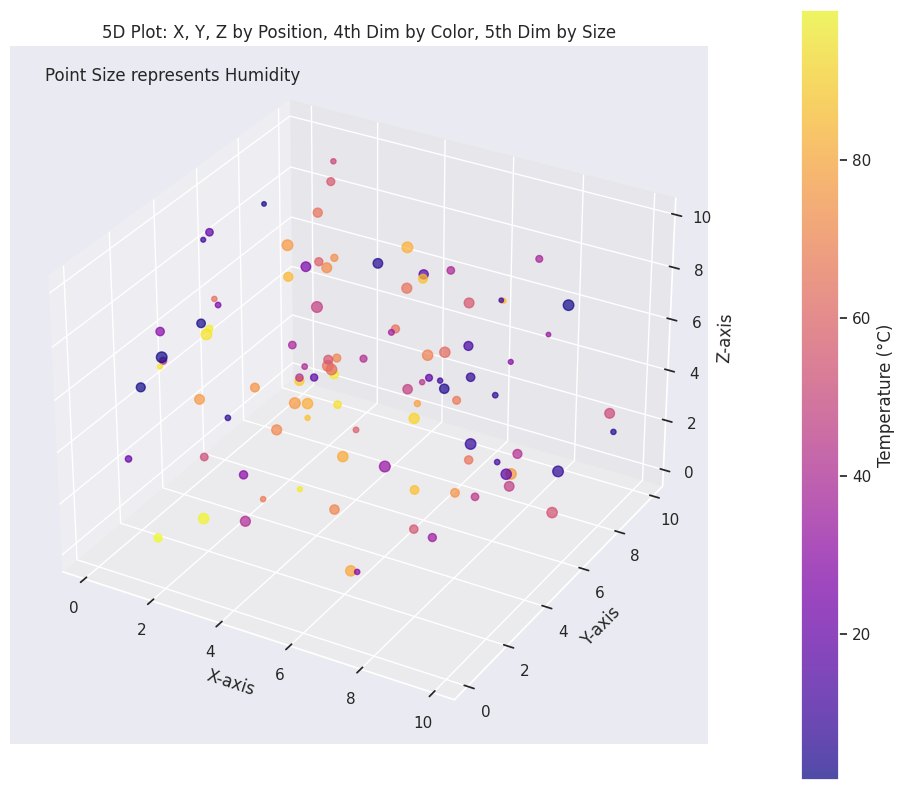

In [ ]:
# "5D" graph plot

import matplotlib.pyplot as plt
import numpy as np

# データの生成
# X, Y, Z は空間座標
# Color_dim は4番目の次元 (例: 温度)
# Size_dim は5番目の次元 (例: 湿度)
num_points = 100
x = np.random.rand(num_points) * 10
y = np.random.rand(num_points) * 10
z = np.random.rand(num_points) * 10
color_dim = np.random.rand(num_points) * 100 # 例: 温度 (0-100)
size_dim = np.random.rand(num_points) * 50 + 10 # 例: 湿度 (10-60), sは点の面積なので適度に調整

# 3Dプロットの設定
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 散布図のプロット
# c=color_dim で色が4番目の次元を表す
# s=size_dim でサイズが5番目の次元を表す
scatter = ax.scatter(x, y, z, c=color_dim, cmap='plasma', s=size_dim, alpha=0.7)

# カラーバーの追加 (4番目の次元のスケールを表示)
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Temperature (°C)')

# 5番目の次元 (サイズ) の凡例は自動では表示されないため、手動でヒントを記述
# 例えば、異なるサイズのダミー点をいくつかプロットして凡例として使う方法もありますが、ここでは説明文で補足
ax.text2D(0.05, 0.95, "Point Size represents Humidity", transform=ax.transAxes)

# ラベルの設定
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('5D Plot: X, Y, Z by Position, 4th Dim by Color, 5th Dim by Size')

plt.show()

# F分布、上側確率が𝛂となる値を上側確率100𝛂％の**パーセント点**という

In [ ]:
from scipy.stats import f

# 自由度を定義
df1 = 5  # 自由度 (m - 1)
df2 = 3 # 自由度 (n - 1)

# 上側確率
alpha = 0.05

# 上側パーセント点
f_critical = f.ppf(1 - alpha, df1, df2)

print(f"F({df1}, {df2})の上側{int(alpha*100)}%点: {f_critical}")

F(5, 3)の上側5%点: 9.013455167522583


# lecture note 11の表12.2の関数で計算と手計算

--------------------------------------------------
x 	 f(x) 	 F(x)
0	0.0	0.0
1	2e-05	2e-05
2	0.00018	0.0002
3	0.00109	0.00129
4	0.00462	0.00591
5	0.01479	0.02069
6	0.03696	0.05766
7	0.07393	0.13159
8	0.12013	0.25172
9	0.16018	0.4119
10	0.1762	0.5881
11	0.16018	0.74828
12	0.12013	0.86841
13	0.07393	0.94234
14	0.03696	0.97931
15	0.01479	0.99409
16	0.00462	0.99871
17	0.00109	0.9998
18	0.00018	0.99998
19	2e-05	1.0
20	0.0	1.0
--------------------------------------------------
平均mean = 10.0
分散variance = 5.0


<BarContainer object of 21 artists>

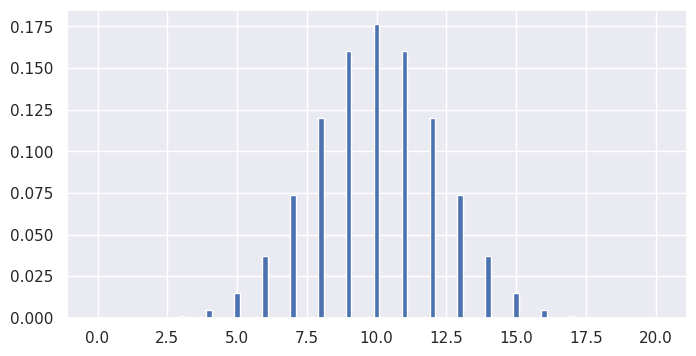

In [ ]:
# 二項分布Bi(20,0.5)
from scipy.stats import binom
from matplotlib import pyplot as plt

n = 20  #試行回数
p = 0.5  #成功確率

x = list(range(n + 1))

mean, var = binom.stats(n, p)  #平均と分散

# list of 確率質量関数(pmf) values
dist = [binom.pmf(r, n, p) for r in x ]
# dist = binom(n, p).pmf(x) #or

cdf = [binom.cdf(r, n, p) for r in x ]

print("-"*50)
print("x \t f(x) \t F(x)") #\t:a horizontal tab character
for i in range(n + 1):
    print(str(x[i]) + "\t" + str(round(dist[i], 5))+ "\t" + str(round(cdf[i], 5)))

print("-"*50)
print("平均mean = {}".format(round(mean, 5)))
print("分散variance = {}".format(round(var, 5)))

plt.bar(x, dist, width = 0.2)

In [ ]:
import math
math.comb(20,14)*(1/2)**14*(1/2)**6+math.comb(20,15)*(1/2)**15*(1/2)**5+\
  math.comb(20,16)*(1/2)**16*(1/2)**4+math.comb(20,17)*(1/2)**17*(1/2)**3+\
  math.comb(20,18)*(1/2)**18*(1/2)**2+math.comb(20,19)*(1/2)**19*(1/2)**1+math.comb(20,20)*(1/2)**20*(1/2)**0

0.058

# lecture note 11の例：投薬群と対照群の平均の差の検定ーー手計算と関数で計算


In [ ]:
# 手計算
# 等分散と仮定した場合

import numpy as np

G_T=np.array([7.97,7.66,7.59,8.44,8.05,8.08,8.35,7.77,7.98,8.15])
G_C=np.array([8.06,8.27,8.45,8.05,8.51,8.14,8.09,8.15,8.16,8.42])

In [ ]:
G_T.var(ddof=1)

np.float64(0.07613777777777773)

In [ ]:
G_C.var(ddof=1)

np.float64(0.029422222222222103)

In [ ]:
G_T.mean()

np.float64(8.004000000000001)

In [ ]:
G_C.mean()

np.float64(8.23)

In [ ]:
# s_p^2　合併分散
(9*0.0761+9*0.0294)/18

0.053

In [ ]:
# s_p　合併標準偏差
np.sqrt((9*0.0761+9*0.0294)/18)

np.float64(0.22967368155711704)

In [ ]:
# t値計算
(8.004-8.230)/(0.230*np.sqrt(0.1+0.1))

np.float64(-2.1971798387606714)

In [ ]:
# t_{0.05}(18)左片側検定の臨界値計算
from scipy.stats import t

# 上側確率
alpha = 0.05

# 上側確率パーセント点
t_critical = t.ppf(1 - alpha, 18)

t_critical

np.float64(1.7340636066175354)

In [ ]:
# ttest_ind関数で計算
from scipy.stats import ttest_ind #平均値の差のt検定-ttest_ind()を使う

t_stat, p_value = ttest_ind(G_T, G_C, equal_var=True, alternative='less') #等分散と仮定したので、equal_var=True。また左片側検定なので、less；両側検定なら、'two-sided'、右片側検定なら、'greater'

print(f"t統計量: {t_stat:.4f}, p値: {p_value:.4e}")

t統計量: -2.1997, p値: 2.0568e-02


# 第8部　正規線形モデル

## 1章　連続型の説明変数を1つ持つモデル

### 実装：分析の準備

In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats
# 表示桁数の設定
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 実装：データの読み込みと図示

In [ ]:
# データの読み込み
beer = pd.read_csv('8-1-1-beer.csv')
print(beer.head(n=3))

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0


<Axes: xlabel='temperature', ylabel='beer'>

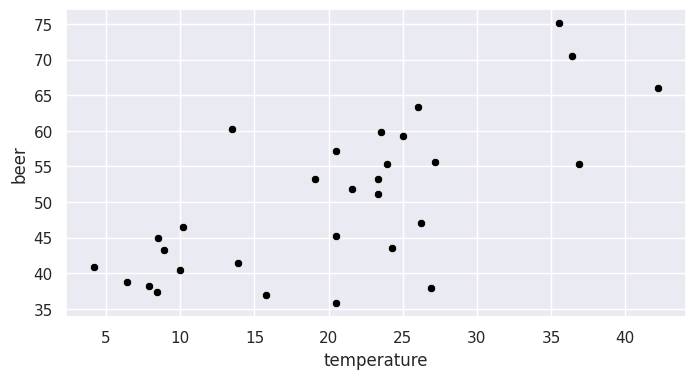

In [ ]:
# 図示
sns.scatterplot(x='temperature', y='beer',
                data=beer, color='black')

### 実装：係数の推定

In [ ]:
# データの準備
x = beer['temperature']
y = beer['beer']

In [ ]:
# 分散共分散行列
cov_mat = np.cov(x, y, ddof=0)
cov_mat

array([[ 93.963,  71.922],
       [ 71.922, 109.237]])

In [ ]:
# 係数の推定

# 平均値
x_bar = np.mean(x)
y_bar = np.mean(y)

# 共分散と分散
cov_xy =  cov_mat[0, 1]
s2_x = cov_mat[0, 0]

# 係数の推定
beta_1 = cov_xy / s2_x
beta_0 = y_bar - beta_1 * x_bar

print('切片      : ', round(beta_0, 3))
print('気温の係数: ', round(beta_1, 3))

切片      :  34.61
気温の係数:  0.765


### 実装：statsmodelsによるモデル化

In [ ]:
# モデルの構築
lm_model = smf.ols(formula='beer ~ temperature',
                   data=beer).fit()

### 実装：推定結果の表示と係数の検定

In [ ]:
# 推定結果の表示
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.11e-05
Time:                        05:34:40   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 実装：AICによるモデル選択

In [ ]:
# NULLモデル
null_model = smf.ols(formula='beer ~ 1', data=beer).fit()

In [ ]:
# NULLモデルのAIC
round(null_model.aic, 3)

np.float64(227.942)

In [ ]:
# 説明変数入りのモデルのAIC
round(lm_model.aic, 3)

np.float64(208.909)

In [ ]:
# 対数尤度
round(lm_model.llf, 3)

np.float64(-102.455)

In [ ]:
# 説明変数の数
lm_model.df_model

1.000

In [ ]:
# AIC
round(-2 * (lm_model.llf - (lm_model.df_model + 1)), 3)

np.float64(208.909)

### 実装：単回帰による予測

#### 当てはめ値

In [ ]:
# 当てはめ値
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825,
       44.943, 54.511, 52.445, 41.116, 54.664, 49.23 ,
       53.21 , 52.445, 41.04 , 52.598, 45.25 , 61.783,
       55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [ ]:
# 参考：当てはめ値を取得する別の方法(書籍には載っていないコードです)
lm_model.fittedvalues

,0
0,50.301
1,53.746
2,42.264
3,55.200
4,46.704
5,37.825
6,44.943
7,54.511
8,52.445
9,41.116


#### 気温が0度のときの予測値

In [ ]:
# 予測
lm_model.predict(pd.DataFrame({'temperature':[0]}))

,0
0,34.61


In [ ]:
# 気温0どの時の予測値は切片に等しい
lm_model.params

,0
Intercept,34.610
temperature,0.765


#### 気温が20度のときの予測値

In [ ]:
# 予測
lm_model.predict(pd.DataFrame({'temperature':[20]}))

,0
0,49.919


In [ ]:
# predict関数を使わないで予測
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

round(beta0 + beta1 * temperature, 3)

np.float64(49.919)

### 実装：信頼区間・予測区間

In [ ]:
# 当てはめ結果の信頼区間と予測区間を得る
pred_interval = lm_model.get_prediction(
    pd.DataFrame({'temperature':[20]}))
pred_frame = pred_interval.summary_frame(alpha=0.05)
print(pred_frame)

     mean  mean_se  mean_ci_lower  mean_ci_upper  \
0  49.919    1.392         47.067          52.77   

   obs_ci_lower  obs_ci_upper  
0        34.053        65.785  


### 実装：seabornによる回帰直線の図示

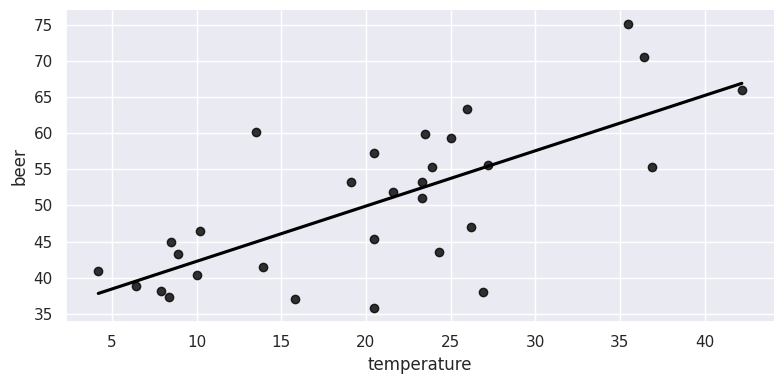

In [ ]:
sns.lmplot(x='temperature', y='beer', data=beer,
           scatter_kws={'color': 'black'},
           line_kws   ={'color': 'black'},
           ci=None, height=4, aspect=2)

<Axes: xlabel='temperature', ylabel='beer'>

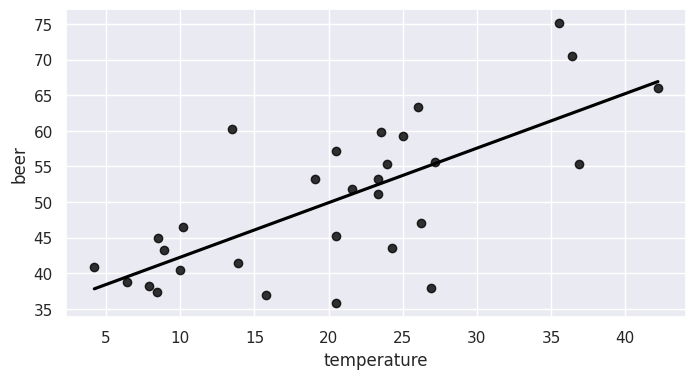

In [ ]:
# 参考：axis-level関数(書籍には載っていないコードです)
sns.regplot(x='temperature', y='beer', data=beer,
           scatter_kws={'color': 'black'},
           line_kws   ={'color': 'black'},
           ci=None)

### 実装：信頼区間と予測区間の図示

In [ ]:
# 当てはめ結果の信頼区間と予測区間を得る
pred_all = lm_model.get_prediction()
pred_frame_all = pred_all.summary_frame(alpha=0.05)

In [ ]:
# 説明変数を付け加える
pred_graph = pd.concat(
    [beer.temperature, pred_frame_all], axis = 1)

# 図示のためにソートする
pred_graph = pred_graph.sort_values("temperature")

In [ ]:
# 参考：グラフ描画用のデータにおける、最初の3行(書籍には載っていないコードです)
pred_graph.head(3)

,temperature,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
5,4.2,37.825,2.703,32.288,43.362,21.264,54.386
29,6.4,39.509,2.438,34.515,44.503,23.122,55.896
23,7.9,40.657,2.264,36.019,45.296,24.375,56.940


<Axes: xlabel='temperature', ylabel='beer'>

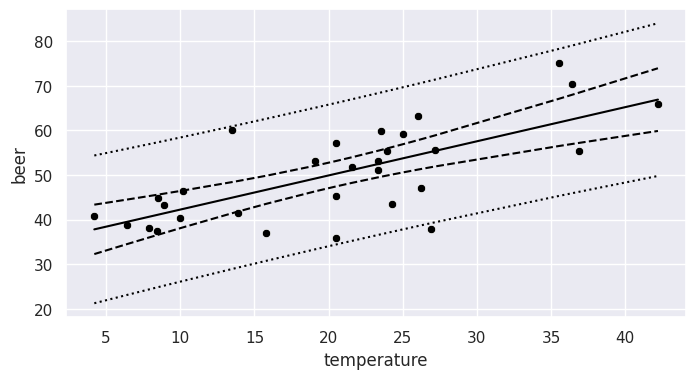

In [ ]:
# 散布図
sns.scatterplot(x='temperature', y='beer',
                data=beer, color='black')

# 回帰直線
sns.lineplot(x='temperature', y='mean',
             data=pred_graph, color='black')

# 信頼区間
sns.lineplot(x='temperature', y='mean_ci_lower',
             data=pred_graph, color='black',
             linestyle='dashed')
sns.lineplot(x='temperature', y='mean_ci_upper',
             data=pred_graph, color='black',
             linestyle='dashed')

# 予測区間
sns.lineplot(x='temperature', y='obs_ci_lower',
             data=pred_graph, color='black',
             linestyle='dotted')
sns.lineplot(x='temperature', y='obs_ci_upper',
             data=pred_graph, color='black',
             linestyle='dotted')

## 2章　正規線形モデルの評価

### 分析の準備

In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats
# 表示桁数の設定
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

In [ ]:
# データの読み込み
beer = pd.read_csv('8-1-1-beer.csv')

# モデル化
lm_model = smf.ols(formula='beer ~ temperature',
                   data=beer).fit()

### 実装：残差の取得

In [ ]:
# 残差の取得
e = lm_model.resid
e.head(3)

,0
0,-5.001
1,5.554
2,-1.864


In [ ]:
# 当てはめ値の計算
beta0 = lm_model.params[0] # 切片
beta1 = lm_model.params[1] # 傾き

y_hat = beta0 + beta1 * beer.temperature # 当てはめ値
y_hat.head(3)

,temperature
0,50.301
1,53.746
2,42.264


In [ ]:
# 参考：当てはめ値の取得(書籍には載っていないコードです)
lm_model.fittedvalues.head(3)

,0
0,50.301
1,53.746
2,42.264


In [ ]:
# 当てはめ値から残差を求める
(beer.beer - y_hat).head(3)

,0
0,-5.001
1,5.554
2,-1.864


### 実装：決定係数

In [ ]:
# 決定係数
y = beer.beer              # 応答変数y
y_bar = np.mean(y)         # yの平均値
y_hat = lm_model.predict() # yの当てはめ値

round(np.sum((y_hat - y_bar)**2) / np.sum((y - y_bar)**2), 3)

np.float64(0.504)

In [ ]:
round(lm_model.rsquared, 3)

np.float64(0.504)

In [ ]:
round(np.sum((y_hat - y_bar)**2) + sum(e**2), 3)

np.float64(3277.115)

In [ ]:
round(np.sum((y - y_bar)**2), 3)

np.float64(3277.115)

In [ ]:
# 決定係数の別の求め方
round(1 - np.sum(e**2) / np.sum((y - y_bar)**2), 3)

np.float64(0.504)

### 実装：自由度調整済み決定係数

In [ ]:
n = len(beer.beer) # サンプルサイズ
d = 1              # 説明変数の数
r2_adj = 1 - ((np.sum(e**2) / (n - d - 1)) /
    (np.sum((y - y_bar)**2) / (n - 1)))
round(r2_adj, 3)

np.float64(0.486)

In [ ]:
round(lm_model.rsquared_adj, 3)

np.float64(0.486)

### 実装：残差の可視化

<Axes: ylabel='Count'>

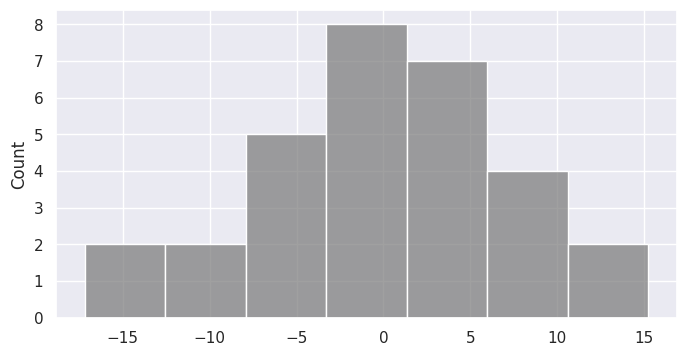

In [ ]:
# 残差のヒストグラム
sns.histplot(e, color='gray')

<Axes: >

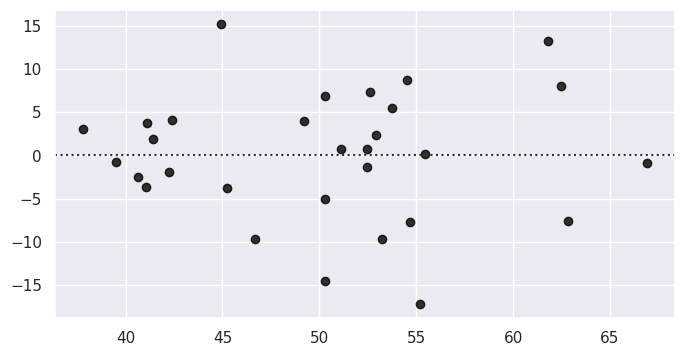

In [ ]:
# 残差の散布図
sns.residplot(x=lm_model.fittedvalues, y=e, color='black')

### 実装：Q-Qプロット

In [ ]:
# ワーニングが出ることがありますが、動作に影響はありません
# やや煩わしいので、ワーニングを出さない設定をしておきました
import warnings
warnings.filterwarnings('ignore')

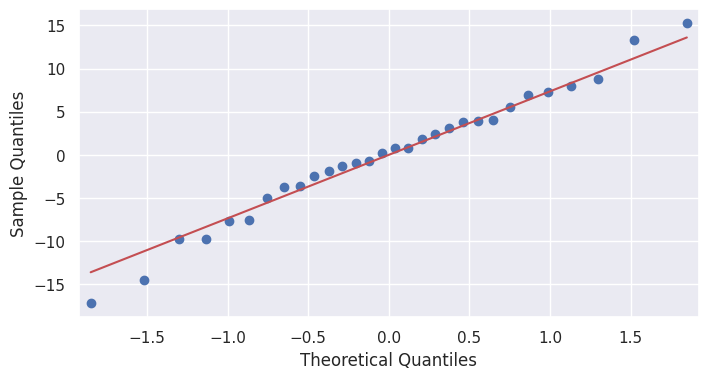

In [ ]:
# Q-Qプロット
fig = sm.qqplot(e, line='s')

In [ ]:
# 小さいものから順番に並び替え
e_sort = e.sort_values()
e_sort.head(n=3)

,0
3,-17.200
21,-14.501
12,-9.710


In [ ]:
# 最も小さな値は全体の下位●％に位置する
round(1 / 31, 3)

0.032

In [ ]:
# サンプルサイズだけ、0~1の範囲を区切る
# これが理論上の累積確率となる
nobs = len(e_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226,
       0.258, 0.29 , 0.323, 0.355, 0.387, 0.419, 0.452,
       0.484, 0.516, 0.548, 0.581, 0.613, 0.645, 0.677,
       0.71 , 0.742, 0.774, 0.806, 0.839, 0.871, 0.903,
       0.935, 0.968])

In [ ]:
# 累積確率に対応するパーセント点
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865,
       -0.753, -0.649, -0.552, -0.46 , -0.372, -0.287,
       -0.204, -0.122, -0.04 ,  0.04 ,  0.122,  0.204,
        0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

<Axes: ylabel='None'>

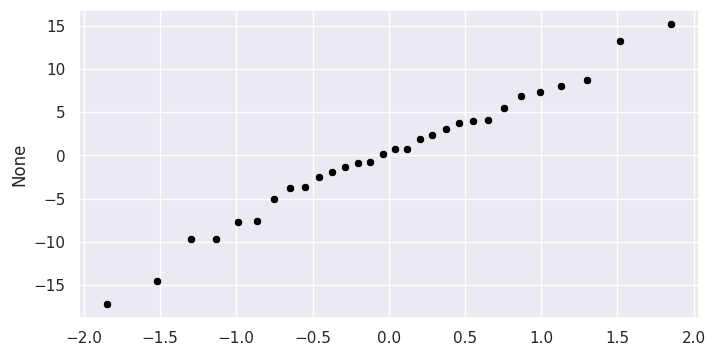

In [ ]:
# 参考：理論上のパーセント点と実際の残差をプロットするとQ-Qプロットになる(書籍には載っていないコードです)
sns.scatterplot(x=ppf, y=e_sort,  color='black')

### 実装：summary関数の出力で見る残差のチェック

In [ ]:
# 推定結果の表示
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.11e-05
Time:                        05:34:42   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 下記は「東京大学のデータサイエンティスト育成講座」から

# 8 機械学習の基礎（教師あり学習）

機械学習は、何かしらの目的を達成するための知識や行動を、データを読み込ませることで機械に獲得させるための技術です。機械学習は大きく、教師あり学習、教師なし学習、強化学習に分けられ、この章では、教師あり学習の具体的手法について学びます。この章を通し、機械学習の考え方とモデル構築の基本作法を理解し、正しく実行できるようになりましょう。


ゴール：機械学習の体系と概要を学び、教師あり学習のモデル（重回帰分析、ロジスティック回帰分析、、リッジ回帰、ラッソ回帰、決定木、k-NN、SVM）を使ってモデル構築や評価を正しく実行できるようになる

## 8.1 機械学習の全体像
ゴール：機械学習の体系と教師あり学習、教師なし学習の概要を知る

この章では、教師あり学習の具体的手法について学びます。教師あり学習は、機械学習の中で最もビジネス活用が進んでいる技術です。この章を通し、機械学習の考え方とモデル構築の基本作法を理解し、正しく実行できるようになりましょう。

教師あり学習の話に入る前に、教師なし学習なども含めて、まずは、機械学習の全体像を俯瞰してみましょう。

### 8.1.1 機械学習とは
キーワード：機械学習、教師あり学習、教師なし学習、強化学習

**機械学習（machine learning）**は、何かしらの目的を達成するための知識や行動を、データを読み込ませることで機械に獲得させるための技術です。機械学習は大きく、**教師あり学習（supervised learning）**、**教師なし学習（unsupervised learning）**、**強化学習（reinforcement learning）**に分けられます。この分け方以外にも、教師あり学習と教師なし学習の2つに分けたり、これらの3つに、さらに半教師あり学習を加えて4つに分けることもあります。

#### 教師あり学習と教師なし学習

機械に読み込ませて知識や行動を獲得させるために使うデータのことを訓練データと言います。
教師あり学習と教師なし学習の違いは、訓練データに、目的変数や説明変数（後述）があるかどうかです。端的に言うと、正解のデータがあってそれを与えるのが教師あり学習、そうでないのが教師なし学習です。

①教師あり学習

説明変数（インプット）から目的変数（アウトプット）を予測するモデルを求める手法です。訓練データには目的変数や説明変数があり、あらかじめ作ったモデルに訓練データの説明変数を入力し、そのモデルからの出力が訓練データの目的変数に近づくようにモデルのパラメータを調整することで学習していきます。この章で詳しく説明します。

たとえば、メールのタイトルや内容（説明変数）からスパムか否か（目的変数）を識別したい、株の売買状況（説明変数）から株価（目的変数）を予測したいときなどに使われます。

②教師なし学習

入力データそのものに着目し、データに潜むパターンや示唆を見いだす手法です。訓練データに目的変数や説明変数はありません。多数のデータをいくつかの類似グループに分けるクラスタリングや、データ次元（変数の数）を、元のデータの情報を失わないようにより少数の次元に縮約する主成分分析（PCA:Principle Component Analysis）などの手法があります。データに解釈を与える探索的分析やデータの次元圧縮（dimentional reduction）などに使われます。こちらは次の章で詳しく説明します。なお、次元圧縮は教師あり学習もありますが、次の章で扱うのは教師なし学習の次元圧縮です。

#### 強化学習

強化学習は、プログラム（機械）の一連の行動の結果に対して報酬を与えることで、機械に実現させたい知識や行動ルールを獲得させようとする手法です。教師あり学習では1つ1つの行動に正解データを付与する必要がありますが、たとえば対戦相手のいるゲームなど相互作用的な環境下で行動ルールを獲得する必要がある場合、すべての局面に対して正解データを付与することは困難です。

そのため、一連の行動の結果に基づく報酬によって行動ルールを獲得させようとする強化学習は、教師あり学習では表現困難なケースを扱える学習方式として、近年注目を集めています。

#### 機械学習を適用するにあたって

本書では、与えられたデータに対して機械学習を適用するところから始めますが、実際のデータ分析の現場においては、「基本統計量を取得する」「ヒストグラムや散布図を作成する」など、データの基本的な観察と理解を怠らないようにしましょう。データの品質は機械学習のアウトプットの品質にも大きな影響を与えるためです。また、そのような一連の確認作業からデータ上の有益な気付きを得られることもあります。機械学習を使うことを目的とせず、あくまで1つの手段であることを留意しておきましょう。

>**[ポイント]**
>
>現場でデータ分析をするときは、機械学習を適応する前に、基本統計量や散布図を作成し、データの傾向や全体像を抑えましょう。

機械学習の入門者には、参考文献「A-18」や参考URL「B-24」が参考になるでしょう。

ビジネス的な視点で機械学習を活かすことを学ぶには参考文献「A-19」などが参考になります。

また、1冊の専門書で機械学習のモデルや実装に関する情報をすべて記載するのは無理なので、何かわからないこと（パラメータの設定など）があった場合、大事になるのは公式ドキュメント(参考URL「B-27」)
に戻ることです。公式ドキュメントはぎっしり書いてあってなかなか読み切れるものではないですが、モデルの細かなパラメータ等の説明がありますので、確実です。

>**[ポイント]**
>
>機械学習等のモデルでパラメータやモデルの特性などわからないことがあれば、まずは公式ドキュメントを調べましょう。

### 8.1.2 教師あり学習
キーワード：目的変数、説明変数、回帰、分類

教師あり学習は、訓練データを与えて、そこに含まれる正解データを予測するためのモデルを構築する手法です。先に説明したとおり、訓練データの中で予測したい変数のことを**目的変数**（他には正解データ、応答変数、ターゲット変数、従属変数などとも呼ばれます）、目的変数を説明するための変数のことを**説明変数**と言います（他には特徴量、予測変数、独立変数などとも呼ばれます）。

$y=f(x)$という関数があるとすると、$y$が目的変数、$x$が説明変数、関数$f(x)$がモデルです。たとえば、ある消費財ブランドの購買者が、将来ブランド非購買になるか否か（目的変数）を予測したいときは、過去のさまざまなデータ（顧客属性、購買頻度、関連ブランドの購入有無など）を説明変数として扱います。

#### 教師あり学習の手法

教師あり学習は目的変数のデータ形式によって、いくつかの種類に分類できます。目的変数が株価など数値を取る場合を**回帰(regression)**、「男性・女性」「幼児・小学生・学生・大人」などのカテゴリになる場合を**分類（classification）**といいます。たとえば先ほどのブランド非購買になるか否かのケースは、「購入する」か「購入しないか」の2つのカテゴリに分ける分類タスクです。

教師あり学習のアルゴリズム（手法）には、**重回帰（multiple linear regression）、ロジスティック回帰（logistic regression）、k近傍法（k-Nearest Neighbors）、決定木（Decision Tree）、サポートベクターマシン（Support Vector Machine）、ランダムフォレスト（Random Forest）、勾配ブースティング（Gradient Boosting）**等があります。これらの手法は、回帰で使われるときもあれば、分類で使われるときもあるので、注意しましょう。

ちなみに、ロジスティック回帰は回帰という名前がついていますが、分類の用途で使われます。決定木は一般的に分類に使う手法ですがこの場合は分類木といい、回帰の場合は回帰木といいます。後に個別に説明します。

どの手法を選択するのかは、求めるモデルの性能で決めるのが基本です。しかし学習結果の解釈性（interpretability/解釈しやすさ）を優先したい場合は重回帰、ロジスティック回帰、決定木などの比較的シンプルな手法を意図的に採用することもあります。サポートベクターマシンなどは説明がしにくく、非専門家が1回聞いてすぐに理解できる手法ではないためです（機械学習で「決定木」は理解しやすいという記載もありますが、非専門家にとっては必ずしもわかりやすい概念ではないことを留意しておきましょう）。解釈性を優先すべき局面なのか、解釈よりも精度を追求すべき局面なのかについて、ケースバイケースで判断するようにしましょう。

### 8.1.3 教師なし学習
キーワード：クラスタリング、主成分分析、マーケットバスケット分析

教師なし学習は目的変数がなく入力データそのものに注目した学習で、データに潜むパターンや示唆を見出そうとするものです。

#### 教師なし学習の手法

教師なし学習の代表的な手法が、多数のデータをいくつかの類似のグループに分ける**クラスタリング（clustering）**です。たとえば、ある消費者がどのような嗜好グループに分かれるかといったマーケティング分析などに使われます。

クラスタリングは、データそのものの特徴を探す手法であることから、探索的なデータ分析手法とも位置づけられます。クラスタリング結果に基づき対象データをグルーピングをしたら終わりではなく、そこに解釈を与えそれがビジネスなどの現場感覚とズレていないかを確認することは重要です。探索的なデータ分析では完全な自動化は難しく、人の判断が重要な役割を担うことを留意しましょう。

教師なし学習にはほかにも、**主成分分析（Principle Component Analysis）**や**マーケットバスケット分析（Market Basket Analysis）**などがあります。主成分分析は、多数の変数をそれらの情報を失わないように縮約して、変数を減らす分析手法です。マーケットバスケット分析はPOS（Point of Sales）といわれる購買データ等の分析に使われ、ある商品Aを買っている人は高い確率である商品Bも買っている、といったアソシエーションルール（関連性の強い事象の組み合わせのこと）を求めてくれる分析手法です。

### 8.1.4 強化学習
キーワード：動的計画法、モンテカルロ法、TD学習

強化学習は、ある報酬を最大化するために何をすべきかの行動ルールを、機械に学習させるための技術です。報酬は機械の一連の行動の結果に対し目的と整合するように設計します。つまり望ましい結果には高い報酬を、望ましくない結果には低い報酬を与えるようにします。教師あり学習のように1つ1つの行動に対する正解データは与えられず、その代わりどのような行動を取ったら最終的により大きな報酬を得られるかを見つけ出そうとします。強化学習では、機械（エージェント）が存在する環境や他のエージェントとの相互作用の中で学習が進みます。

実例で言うとたとえば、「赤ちゃん（エージェント）は歩き方を教わっていないのに自分がおかれている環境の中から試行錯誤しながら歩けるようになる」「自動車（エージェント）が他の自動車（他のエージェント）と衝突することなく走行できるようになる」などが、強化学習の例となります。

#### 強化学習の手法

強化学習ではエージェントが探索的に行動し、環境との相互作用の中から学習が進むため、探索と知識利用のジレンマ（Exploration-Exploitation Dilemma）をどのように扱うかが重要なテーマです。これは、過去の行動から学んだ結果を踏まえて「一番良い行動」を取っていたら新しい行動を見つけられなくなるし（知識に偏る）、「もっと良い行動」を求めて新しい行動ばかりしていると過去の経験を活かせない（探索に偏る）ので、探索と知識利用のバランスをどうとるかが大切、ということです。

強化学習のアプローチには動的計画法、モンテカルロ法やTD学習などがあります。動的計画法は明示的な知識があることを前提としますが、モンテカルロ法は環境における完全な知識を必要とせず経験のみを必要とする方法です。なお本書では、強化学習については以上の概念の紹介までとします。さらに学習を深めたい方は、上記までに登場した用語を参考に、参考文献「A-21」や参考URL「B-26」のOpenAIのサイトなどを参照して下さい。

### 8.1.5 この章で使うライブラリのインポート


Scikit-learnは、単回帰分析の際にも使いました。Scikit-learnの公式ドキュメントには、詳細な仕様や使い方が記されているので、参考にしてください。Sciklt-learnのライブラリには、機械学習用のクラスだけでなくサンプルデータもいくつか含まれています。

https://scikit-learn.org/stable/user_guide.html

In [ ]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

## 8.2 重回帰
キーワード：目的変数、説明変数、多重共線性、変数選択法

教師あり学習の1つ目として、まずは、**重回帰（multiple lienar regression）**について学びます。単回帰では目的変数に対して説明変数は1つでした。この考え方を拡張し、説明変数が1つではなく複数ある場合を扱うのが重回帰です。重回帰によって、各説明変数の係数（回帰係数）が推定され予測値を計算できます。回帰係数は予測値と目的変数の2乗誤差が最小になるように推定されます。

[](いまさらですが、改めて読み直したところ、3章で、「回帰係数とは何か」について、初出時に、きちんと定義しておいたほうがよいかとも思いました。3章では「**最小二乗法**という手法で回帰係数$a$と切片$b$を計算しています。」が初出でした)

### 8.2.1 自動車価格データの取り込み

それでは、実際にやってみましょう。ここでは、自動車の価格とそれらの属性（自動車の大きさなど）データがあるとき、その属性から自動車価格を予測するモデルを重回帰を使って構築してみましょう。
データは、次のURLで公開されているものを利用します。

http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [ ]:
# インポート
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

上記のプログラムを実行すると、変数`auto`にPandasの`DataFrame`オブジェクトとして、自動車価格データが設定されます。
実際に、どのようなデータなのか確認してみましょう。

In [ ]:
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(205, 26)


205行、26列のデータであることが分かります。

続いて次のように`head()`メソッドで、最初の5行を表示してみます。

In [ ]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


このデータにおいて、自動車の価格は`price`に設定されています。ここでは自動車の属性から価格を予測するモデルを作ろうとしているのですから、`price`以外の値から`price`を予測するモデルを作るというのが課題となります。

すべての説明変数から`price`を予測するのは複雑なので、ここでは、`horsepower`、`width`、`height`の3つの説明変数だけを使うものとします。つまり、`horsepower`、`width`、`height`という説明変数から`price`という目的変数を予測するというモデルを作成していくものとします。

### 8.2.2 データの整理

入力データには不適切なものが含まれていることがあります。そこでまずは、データの内容を確認して適切なデータとして整理します。

#### 不適切なデータの除去

先ほど`head()`を使ってデータを確認しましたが、このとき、データの中に'?'のあることに気づきます。多くの機械学習のアルゴリズムは、数値型データしか扱えないため、このような「?」などの非数値データを含む変数に対しては、それを取り除く前処理が必要です。

今回の目的は`horsepower`、`width`、`height`から`price`を予測することなので、これらの変数に'?'データがあれば削除します。具体的には、'?'データを欠損値に変換をした上で欠損値を含む行を除外します。扱おうとしている`horsepower`、`width`、`height`、`price`の4つ変数に'?'データが、どれだけ含まれているのかは、次のプログラムで確認できます。

In [ ]:
# それぞれのカラムに ? が何個あるかカウント
auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

,0
price,4
horsepower,2
width,0
height,0


`price`と`horsepower`に'?'データが混入していることがわかるので、次のようにすると'?'がある行が除去されます。実行すると、行数が減っていることが確認できます。

In [ ]:
# '?'をNaNに置換して、NaNがある行を削除
auto = auto.replace('?', np.nan).dropna()
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(199, 4)


#### 型の変換
ここでデータの型を確認しておきましょう。次のようにして確認します。

In [ ]:
print('データ型の確認（型変換前）\n{}\n'.format(auto.dtypes))

データ型の確認（型変換前）
price          object
horsepower     object
width         float64
height        float64
dtype: object



確認すると`price`と`horsepower`が数値型ではないことがわかります。そこで`to_numeric`を使って数値型に変換しておきます。

In [ ]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('データ型の確認（型変換後）\n{}'.format(auto.dtypes))

データ型の確認（型変換後）
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


#### 相関の確認

以上の操作で、説明変数、目的変数のすべての行は、欠損が無くかつ数値型のデータ形式に加工されました。
続けて各変数の相関を確認します。次のように`corr`を使うと、相関を確認できます。

In [ ]:
auto.corr()

,price,horsepower,width,height
price,1.000,0.811,0.754,0.135
horsepower,0.811,1.000,0.615,-0.087
width,0.754,0.615,1.000,0.309
height,0.135,-0.087,0.309,1.000


`price`が今回の目的変数なので、それ以外の3変数に注目をすると、`width`と`horsepower`の相関が0.6程度と、やや高いことに気づきます。なぜこのような確認をしているかというと、相関の高い変数を同時に重回帰の説明変数とすると、**多重共線性（multi-collinearity）**が生じる可能性があるからです。


多重共線性とは変数間の高い相関のために回帰係数の分散が大きくなり、係数の有意性が失われてしまう現象です。このような現象を回避すべく、通常、重回帰のモデル構築においては、相関の高い変数群からは代表となる変数だけをモデルに使用します。しかしここでは実験なのでそこまで厳密に考えず、`width`と`horsepower`の両方を、`height`と一緒に残してモデル構築を進めることとします。



### 8.2.3 モデル構築と評価

データが揃ったのでモデルを構築してみましょう。重回帰のモデルを作り、その性能を調べるプログラムは下記のようになります。

下記のプログラムでは、説明変数を$X$、目的変数を$y$に設定しています。

機械学習のモデル構築では、「モデル構築に使用する訓練データ」を使って学習させてモデルを構築し、そのモデルに訓練データとは別の「テストデータ」を入れて、テストデータに対して、どの程度の精度が得られるのかを確認することで性能を調べるのが一般的です。そこで以下では、Scikit-learnの`model_selection`モジュールの`train_test_split`関数を使い、訓練データとテストデータに分けています。

この関数はデータをランダムに2つに分ける関数です。どのような割合で分類するのかは`test_size`で決めます。ここでは`test_size`を0.5にしているので半分ずつに分かれます（たとえば、0.4にすると4対6に分けることもできます）。

`random_state`は乱数の生成を制御するものです。ここでは`random_state`を0に設定しています。このように`random_state`を固定する（この場合は0に設定する）とランダム性がなくなり、何度実行しても、同じように分離されます。もし0でないと、実行のたびに、ある行が訓練データに分類されたりテストデータに分類されたりとまちまちになるので、結果が一定となりません。ですからモデル性能の実証段階では、`random_state`を固定して再現性を持たせることは、とても重要です。


重回帰のモデル構築は、`LinearRegression`クラスを使って行います。「`model = LinearRegression()`」でインスタンスを作成して、訓練データを「`model.fit(X_train,y_train)`」のように読み込ませると学習が完了します。学習したら、決定係数や回帰係数、切片を確認できます。決定係数とは、目的変数によって予測された値が、実際の目的変数の値とどのくらい近いかを示す値です。

機械学習の目的は高い汎化性能の獲得（構築したモデルによって、未知データでも適切に予測できること）ですから、訓練データへのあてはまりを追求すれば良いモデルになりそうですが、実際はそうではなく、訓練データに対する精度は良いがテストデータに対する精度が低くなるということがしばしば起きます。このことを**過学習（overfitting）**もしくは**過剰学習**と呼び、モデル構築の段階において最も注意を要する検証事項です。

In [ ]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = auto.drop('price', axis=1)
y = auto['price']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.733
決定係数(test):0.737

回帰係数
horsepower      81.651
width         1829.175
height         229.510
dtype: float64
切片: -128409.046


決定係数は`score`メソッドで取得できます。上記の結果では、`train`（訓練データ）で0.733、`test`（テストデータ）で0.737とわかります。訓練時スコアとテスト時のスコアが近いことから、このモデルは過学習に陥ってはいないと判断できます。

### 8.2.4 モデル構築とモデル評価の流れのまとめ

以上が重回帰によるモデル構築とモデル評価の流れです。以下で学ぶ決定木やSVMなども基本的に同じ流れで実行していきます。つまり、以下の流れがモデル構築とモデル評価の基本であることを押さえましょう。

- 各種モデル構築のためのクラスのインスタンス化：`model = LinearRegression()`
- データを説明変数と目的変数に分ける：$X$と$y$
- 訓練データとテストデータに分ける：`train_test_split(X, y, test_size=0.5, random_state=0)`
- 訓練データによるあてはめ（学習）：`model.fit(X_train, y_train)`
- モデルの汎化性能をテストデータで確かめる：`model.score(X_test, y_test)`

ここでは、モデル構築の際、使用する説明変数として`horsepower`、`width`、`height`の3つを恣意的に選択しましたが、統計的に選択する方法もいくつかあります。具体的には、**変数増加法（前進的選択法）**、**変数減少法（後退的選択法）**、**ステップワイズ法**などで、選択するための規準も、RMSE（Root Mean Squared Error）、赤池情報量規準（AIC）、ベイズ情報量規準（BIC）などがあります。これらも絶対的にこの方法が有効というものではなく、モデルの汎化性能であったりビジネスドメイン知識なども考慮され選択されます。上記方法についての詳細は本書では割愛しますので、さらに学習を深めたい方は調べてみてください。

>**[やってみよう]**
>
>変数増加法、変数減少法、ステップワイズ法について調べてみましょう。

####  <練習問題 8-1>
本編で利用した自動車価格データを利用します。
このデータに対して、目的変数を`price`とし、説明変数に`length`と`engine-size`を使って重回帰のモデル構築をしてみましょう。このとき`train_test_split`を使って訓練データとテストデータが半分になるように分けてモデルを構築し、テストデータを使って、モデルのスコアを求めてください。`train_test_split`を実行する際には、`random_state`オプションを0に設定してください。

####  <練習問題 8-2>
<練習問題 8-1>のデータに対して、目的変数は同じ`price`で、上記とは別の説明変数を使って重回帰のモデル構築をしてみましょう。ただし、訓練データとテストデータが半分になるように分けて学習して、テストデータでスコアを求めてください。なお、訓練データとテストデータ分ける関数の`random_state`は0に設定して実施してください。モデルの結果がどのように変わったでしょうか。またその原因を考察してみましょう。

## 8.3 ロジスティック回帰
キーワード：ロジスティック回帰、交差エントロピー誤差関数、オッズ比

先に見てきたとおり、重回帰モデルは説明変数が複数ある回帰モデルで、目的変数は数値でした。このような変数を数値変数と言います。

本節で学ぶ**ロジスティック回帰（logistic regression）**は目的変数が数値ではなく、たとえば、ある商品を買うか買わないか、ある会社が倒産するかしないかといった、カテゴリのデータを扱うアルゴリズムです。このようにカテゴリの形になっている変数をカテゴリ変数と言います。

データサンプルが、あるカテゴリに属するかどうかの確率を計算するタスクを分類（classification）といい、そのためのアルゴリズムの1つがロジスティック回帰です。

回帰という名前がついていますが、分類を扱うアルゴリズムですので注意しましょう（また、2分類だけではなく3分類以上についても使えます）。目的変数が数値の時と違い、分類タスクでは以下の目的関数が最小になるように学習します。この目的関数を**交差エントロピー誤差関数（cross-entropy error function）**と言い、正解カテゴリを予測できる確率が高くなるほど値が小さくなります。

\begin{eqnarray}
-\sum^n_{i=1}[y_ilog(f(x_i))+(1-y_i)log(1-f(x_i))]
\end{eqnarray}

### 8.3.1 ロジスティック回帰の例

それでは具体的にロジスティック回帰の実行例を見ていきましょう。ここでは、年齢や性別、職業などの個人に関するデータから、その人の収入が50K（5万ドル）を超えるかどうかを予測するためのモデルを構築してみましょう。元となるデータは、次のURLで取得できるものとします。

http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

まずは次のようにデータを取得し、カラム名を設定します。データは32561行15例で構成されており、欠損値はありません。`head()`を使ってデータの先頭を見ると、`wrokclass`や`education`などのカテゴリ変数と`age`や`education_num`などの数値変数が混在したデータセットであるとわかります。

In [ ]:
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
adult.columns =['age','workclass','fnlwgt','education','education-num','marital-status',
                             'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week',
                             'native-country','flg-50K']


# データの形式と欠損数を出力
print('データの形式:{}'.format(adult.shape))
print('欠損の数:{}'.format(adult.isnull().sum().sum()))

# データの先頭5行を出力
adult.head()

データの形式:(32561, 15)
欠損の数:0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 8.3.2 データの整理

このデータセットにおいて、収入が50Kを超えるかどうかを示す目的変数は`flg-50K`です。データの値は「`<=50K`」と「`>50K`」で、このままでは扱いにくいので、0または1のフラグが入った変数に変換します。まずは、「`<=50K`」と「`>50K`」の行が、それぞれいくつあるかを確認してみます。

In [ ]:
adult.groupby('flg-50K').size()

,0
flg-50K,
<=50K,24720
>50K,7841


「<=50K」が24,720行、「>50K」が7,841行であることが分かります。

次に、「fin_flg」というカラムを追加して、「`>50K`」である行には1、それ以外は0とフラグ立てをします。フラグ立てには`lambda`や`map`を使います。変換したら、念のため上の集計結果と同じであることをチェックします。

In [ ]:
# 「fin_flg」カラムを追加し、もし「flg-50K」カラムの値が「>50K」だったら1、そうでなければ0をセットする
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x ==' >50K' else 0)
adult.groupby('fin_flg').size()

,0
fin_flg,
0,24720
1,7841


「<=50K」と「>50K」の行数が、「0」と「1」の行数と一致したのでうまくいったことが分かります。

### 8.3.3 モデル構築と評価
いよいよロジスティク回帰のモデル構築です。説明変数として、数値変数の`age`、`fnlwgt`、`education-num`、`capital-gain`、`capital-loss`を使うことにします。目的変数は、先ほど「1」と「0」のフラグを立てた`fin_flg`です。

ロジスティック回帰のモデル構築には`LogisticRegression`クラスを使います。訓練データとテストデータに分けたり、`score`メソッドで評価したりする方法は、重回帰のときと同じです。

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数と目的変数の設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.796
正解率(test):0.799


上記の結果から、訓練データとテストデータともに約79%の正解率であり、過学習は起きていないと判断できます。

学習済みモデルの各変数（age、fnlwgt、education-num、capital-gain、capital-loss）の係数を、`coef_`属性を取得することで確認してみます。

In [ ]:
model.coef_

array([[-5.624e-03, -3.846e-06, -3.642e-02,  3.286e-04,
         7.666e-04]])

また、それぞれのオッズ比は以下のように算出できます。オッズ比とは、それぞれの係数が1増加したとき、正解率にどの程度影響があるかを示す指標です。

In [ ]:
np.exp(model.coef_)

array([[0.994, 1.   , 0.964, 1.   , 1.001]])

### 8.3.4 スケーリングによる予測精度の向上

ここで予測精度を上げるためのアプローチの1つであるスケーリングについて紹介します。このモデルでは`age`、`fnlwgt`、`education-num`、`capital-gain`、`capital-los`の5つの説明変数を使っていますが、それぞれの単位や大きさは異なっています。このままだとモデルの学習が値の大きな変数に引っ張られ値の小さな変数の影響が小さくなる懸念があります。

そこでそうならないようにするため、説明変数の標準化を実施します。標準化とはスケーリングの一種で、データの各値から変数列の平均を引き、標準偏差で割ります。こうすることで変数間の単位が消え数値の大小と意味するところが合致します（値が0ならそれは平均値、1なら1標準偏差だけ平均値より大きい値とわかります）。データを標準化するには`StandardScaler`クラスを使います。

In [ ]:
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Xとyを設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train_std,y_train)

# 正解率の表示
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.811
正解率(test):0.810


上記の結果を見るとわかるように、標準化しない場合に比べて正解率が上昇しています。このように説明変数の尺度を揃えることで、機械学習のアルゴリズムをよりうまく動作させられます。標準化処理で留意しておきたいポイントは、訓練データの平均値と標準偏差を使用している点です。テスト用データは将来手に入るであろう未知データという位置づけですから、そのデータを使ってモデルを標準化することはできません。

####  <練習問題 8-3>
`sklearn.datasets`モジュールの`load_breast_cancer`関数を使って乳がんデータを読み込んで、目的変数を`cancer.target`として、`cancer.data`を説明変数にロジスティック回帰で予測モデルを構築してください。この時、訓練データとテストデータに分ける`train_test_split（random_state=0）`を使って、テストデータにおけるスコアを求めてください。

####  <練習問題 8-4>
<練習問題 8-3>と同じ設定で、同じデータに対して、特徴量を標準化してモデル構築してみてください。その上で、上記の結果と比較してください。